<a href="https://colab.research.google.com/github/AliSakr9997/Predicting_Fifa_22_Cards_Ratings_/blob/main/Predicting_Fifa_22_Cards_Ratings_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMPORTING LIBIRARIES**

In [3]:
#Manpulate and Preprocessing data
import numpy as np
import pandas as pd

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

#Metrices
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score,precision_score,recall_score,accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score

#Fine Tuning
from sklearn.model_selection import GridSearchCV

# **Exploring and Preprocessing**

**LOAD DATA**

In [4]:
df = pd.read_csv("FIFA22_official_data.csv")

#Making Copy for Further Data Preprocessing
df1 =df.copy()
df1

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16496,244172,M. Harsman,21,https://cdn.sofifa.com/players/244/172/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,60,68,SV Meppen,https://cdn.sofifa.com/teams/110597/30.png,...,10.0,62.0,61.0,61.0,60.0,62.0,GK,60.0,€784K,13.0
16497,258885,Luiz Júnior,20,https://cdn.sofifa.com/players/258/885/22_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,66,78,Futebol Clube de Famalicão,https://cdn.sofifa.com/teams/112809/30.png,...,12.0,68.0,66.0,63.0,67.0,69.0,GK,66.0,€4.1M,6.0
16498,254300,J. García,18,https://cdn.sofifa.com/players/254/300/22_60.png,Colombia,https://cdn.sofifa.com/flags/co.png,60,77,Getafe CF,https://cdn.sofifa.com/teams/1860/30.png,...,11.0,61.0,56.0,56.0,58.0,62.0,GK,60.0,€1.6M,7.0
16499,236568,B. Austin,22,https://cdn.sofifa.com/players/236/568/22_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,64,72,Orlando City Soccer Club,https://cdn.sofifa.com/teams/112606/30.png,...,12.0,69.0,63.0,55.0,64.0,62.0,GK,64.0,NaN,21.0


In [5]:
df1.shape

(16501, 65)

In [6]:
#Filtering Some Players and Exploring Their Stats
players = ['M. Salah', 'L. Messi', 'Cristiano Ronaldo', 'Neymar Jr', 'R. Lewandowski']
df1[df1['Name'].isin(players)][['Name', 'Overall', 'Best Overall Rating','Club', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'ShotPower']]

,Name,Overall,Best Overall Rating,Club,Crossing,Finishing,HeadingAccuracy,ShortPassing,ShotPower
29,L. Messi,93,93.0,Paris Saint-Germain,85.0,95.0,70.0,91.0,86.0
33,R. Lewandowski,92,92.0,FC Bayern München,71.0,95.0,90.0,85.0,90.0
34,M. Salah,89,89.0,Liverpool,79.0,91.0,59.0,84.0,82.0
36,Cristiano Ronaldo,91,91.0,Manchester United,87.0,95.0,90.0,80.0,94.0
64,Neymar Jr,91,91.0,Paris Saint-Germain,85.0,83.0,63.0,86.0,80.0


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16501 entries, 0 to 16500
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16501 non-null  int64  
 1   Name                      16501 non-null  object 
 2   Age                       16501 non-null  int64  
 3   Photo                     16501 non-null  object 
 4   Nationality               16501 non-null  object 
 5   Flag                      16501 non-null  object 
 6   Overall                   16501 non-null  int64  
 7   Potential                 16501 non-null  int64  
 8   Club                      16242 non-null  object 
 9   Club Logo                 16500 non-null  object 
 10  Value                     16500 non-null  object 
 11  Wage                      16500 non-null  object 
 12  Special                   16500 non-null  float64
 13  Preferred Foot            16500 non-null  object 
 14  Intern

In [8]:
df1.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,DefensiveAwareness
count,16501.000000,16501.000000,16501.000000,16501.000000,16500.000000,16500.000000,16500.000000,16500.000000,16478.000000,16500.000000,...,888.000000,16500.000000,16465.00000,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,15612.000000
mean,220190.233016,25.793952,67.780438,72.608690,1662.473273,1.172061,3.015939,2.494242,20.312417,52.724970,...,48.157658,49.624909,47.27276,15.141697,15.002424,14.951091,15.079758,15.242606,68.710909,48.536062
std,38530.913827,5.034086,6.362254,5.682169,243.085492,0.487962,0.678468,0.778618,17.614870,17.288498,...,21.835501,21.178958,20.93678,16.400047,15.721445,15.547088,16.055983,16.713796,6.137015,19.799033
min,27.000000,16.000000,44.000000,46.000000,920.000000,1.000000,1.000000,1.000000,1.000000,7.000000,...,4.000000,3.000000,6.00000,1.000000,1.000000,1.000000,1.000000,1.000000,44.000000,3.000000
25%,203581.000000,22.000000,64.000000,69.000000,1533.000000,1.000000,3.000000,2.000000,8.000000,43.000000,...,27.750000,30.000000,27.00000,8.000000,8.000000,8.000000,8.000000,8.000000,65.000000,31.000000
50%,228794.000000,25.000000,68.000000,72.000000,1691.000000,1.000000,3.000000,2.000000,17.000000,57.000000,...,54.000000,57.000000,54.00000,11.000000,11.000000,11.000000,11.000000,11.000000,69.000000,54.000000
75%,245062.000000,29.000000,72.000000,76.000000,1828.000000,1.000000,3.000000,3.000000,26.000000,65.000000,...,67.000000,67.000000,65.00000,14.000000,14.000000,14.000000,14.000000,14.000000,73.000000,65.000000
max,264704.000000,54.000000,93.000000,95.000000,2341.000000,5.000000,5.000000,5.000000,99.000000,94.000000,...,94.000000,93.000000,95.00000,91.000000,92.000000,93.000000,93.000000,90.000000,93.000000,93.000000


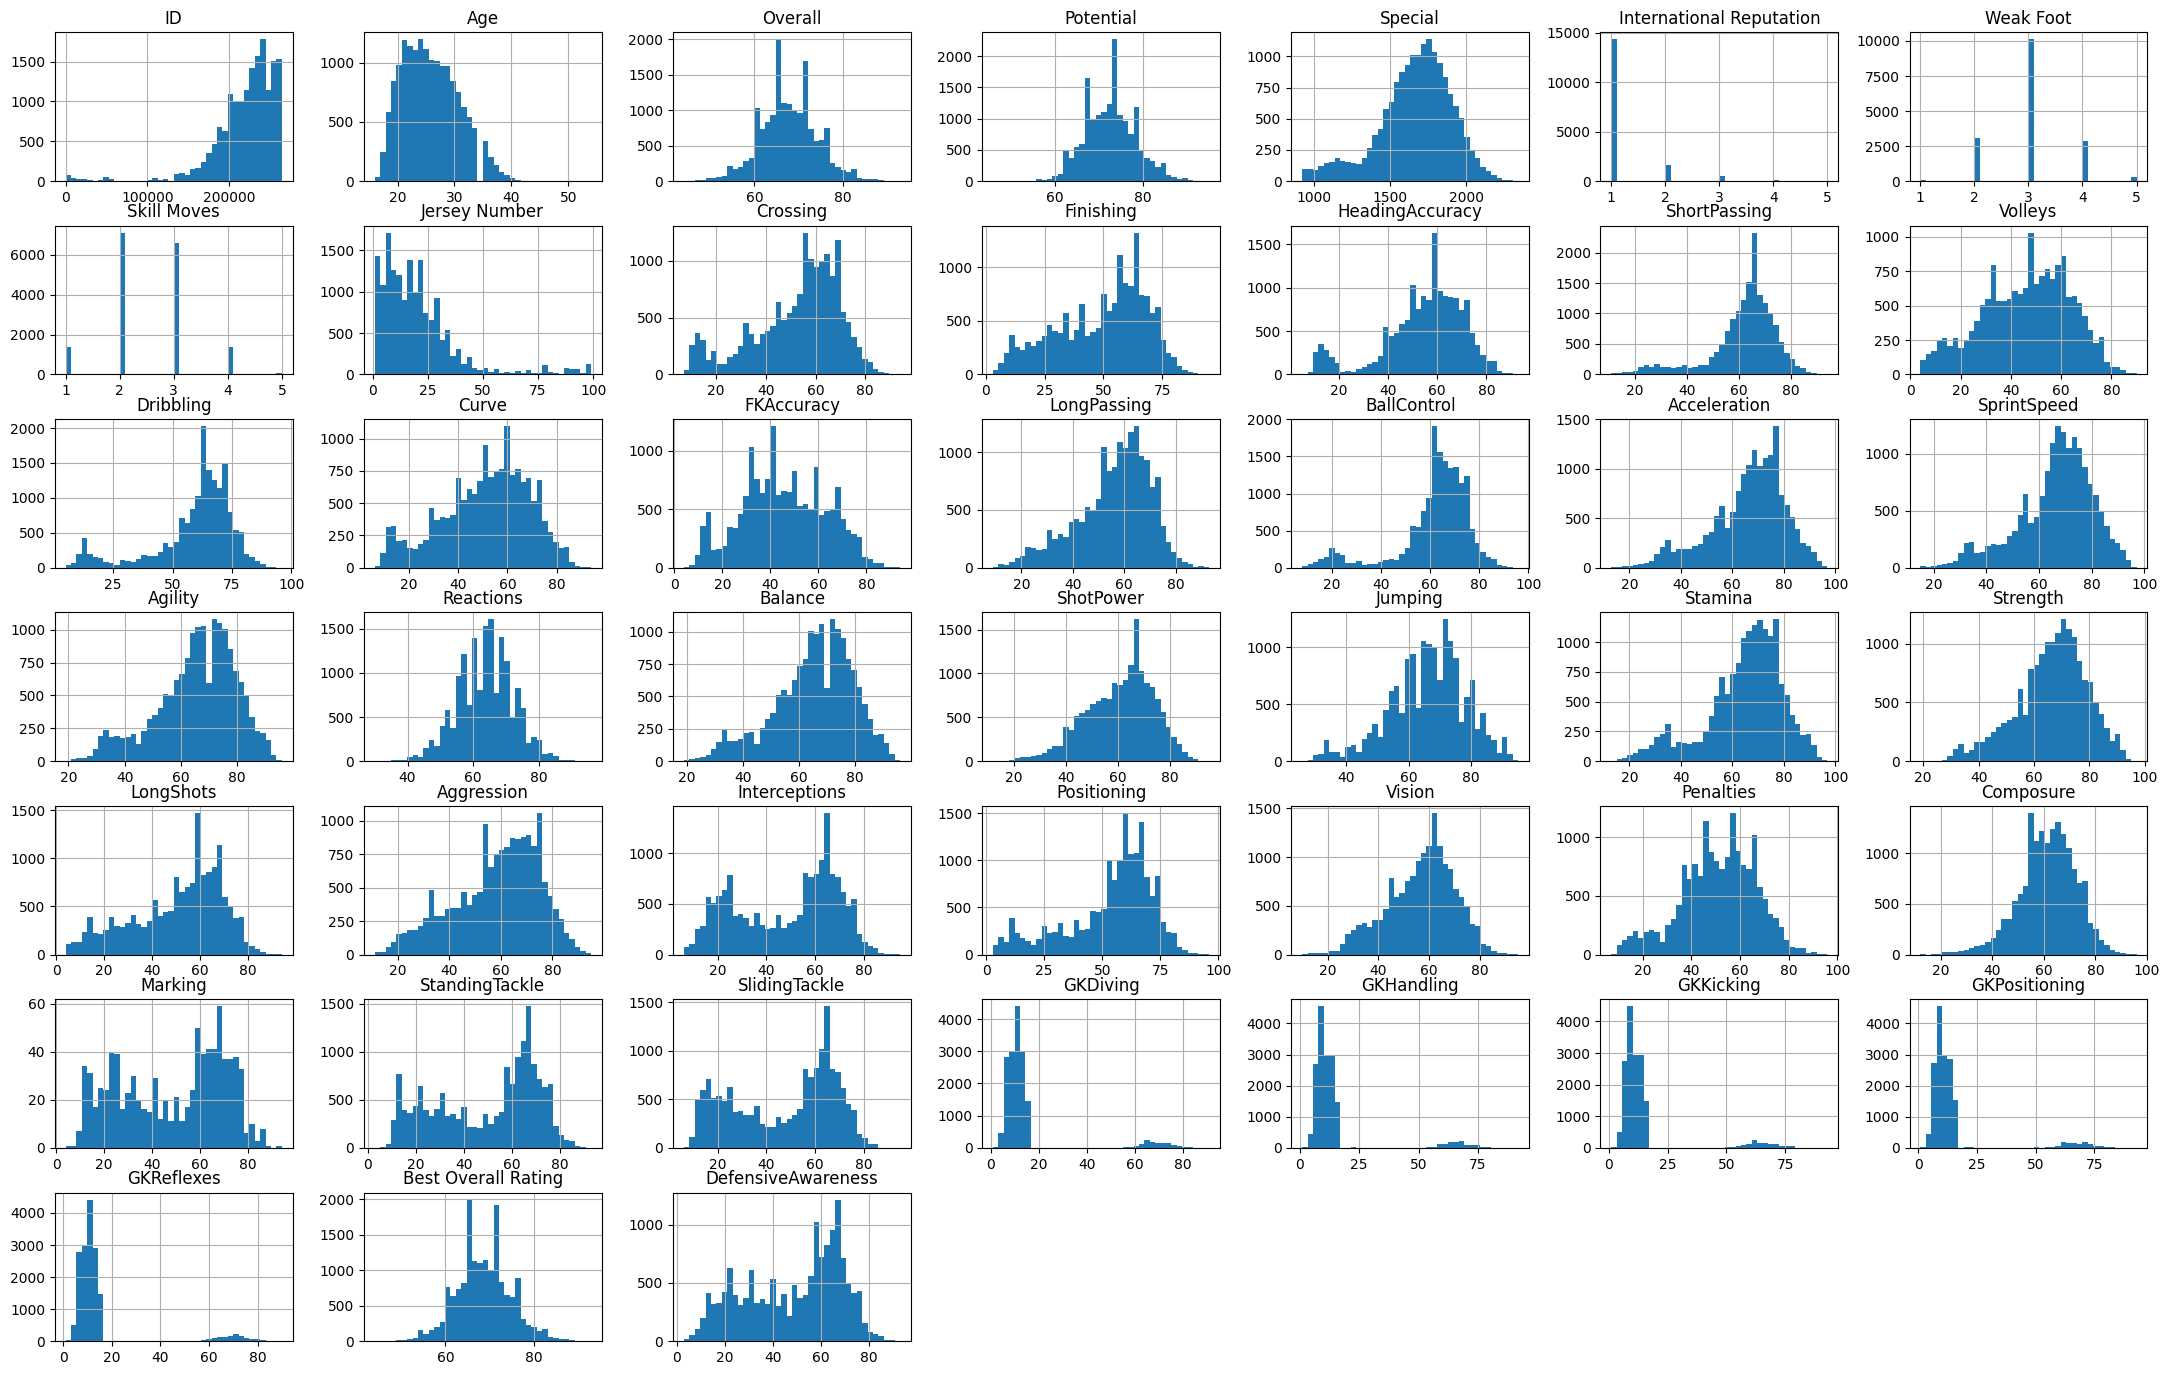

In [9]:
#Ploting all Features
df1.hist(bins=40, figsize=(27,17))
plt.show()

**Removing Unnecessary Features**

In [10]:
df.drop(columns=['ID', 'Name','Potential','Age','Special', 'Photo', 'Nationality',
                'Flag', 'Club', 'Club Logo', 'Value', 'Wage',
                'Preferred Foot', 'Work Rate', 'Body Type', 'Real Face',
                'Position', 'Jersey Number','Loaned From', 'Joined', 'Contract Valid Until',
                'Height', 'Weight', 'Best Overall Rating', 'Best Position', 'Release Clause', 'International Reputation', 'Stamina'], inplace=True)

**Checking for Nan Values**

In [11]:
remaning_missing_values = df.isna().sum()
remaning_missing_values = remaning_missing_values[remaning_missing_values > 0]
print(remaning_missing_values)

Weak Foot                 1
Skill Moves               1
Crossing                  1
Finishing                 1
HeadingAccuracy           1
ShortPassing              1
Volleys                  36
Dribbling                 1
Curve                    36
FKAccuracy                1
LongPassing               1
BallControl               1
Acceleration              1
SprintSpeed               1
Agility                  36
Reactions                 1
Balance                  36
ShotPower                 1
Jumping                  36
Strength                  1
LongShots                 1
Aggression                1
Interceptions             8
Positioning               8
Vision                   36
Penalties                 1
Composure               249
Marking               15613
StandingTackle            1
SlidingTackle            36
GKDiving                  1
GKHandling                1
GKKicking                 1
GKPositioning             1
GKReflexes                1
DefensiveAwareness  

In [12]:
# Dropping 'Marking' Column as it is Almost Filled with NaNs
df.drop(columns=['Marking'], inplace=True)

In [13]:
#Droping Rows Containing Any NaNs
df.dropna(inplace=True)

# Figuring Out How Many Rows Are Left After Dropping
df.shape

(15612, 36)

In [14]:
# Checking for Any NaN Values
df.isna().any()

,0
Overall,False
Weak Foot,False
Skill Moves,False
Crossing,False
Finishing,False
HeadingAccuracy,False
ShortPassing,False
Volleys,False
Dribbling,False
Curve,False


**Spilting Data into Train & Test**

In [15]:
#Dividng Data with Ensuring Randomness
train_set, test_set = train_test_split(df, test_size=0.30, random_state=42,shuffle=True)

#Getting the Length of Train and Test Data
print("Length of training data:", len(train_set))
print("Length of testing data:", len(test_set))
print("Length of total data:", len(df))

Length of training data: 10928
Length of testing data: 4684
Length of total data: 15612


**Measuring Correlation between 'Overall' and the rest of Features**

In [16]:
df1=df.copy()
corr_matrix = df1.corr()
corr_matrix['Overall'].sort_values(ascending=False)

,Overall
Overall,1.000000
Reactions,0.870400
Composure,0.671261
ShotPower,0.505573
Vision,0.473757
ShortPassing,0.454148
LongPassing,0.447448
BallControl,0.375110
Aggression,0.335861
Curve,0.335779


**Plotting the Correlation**

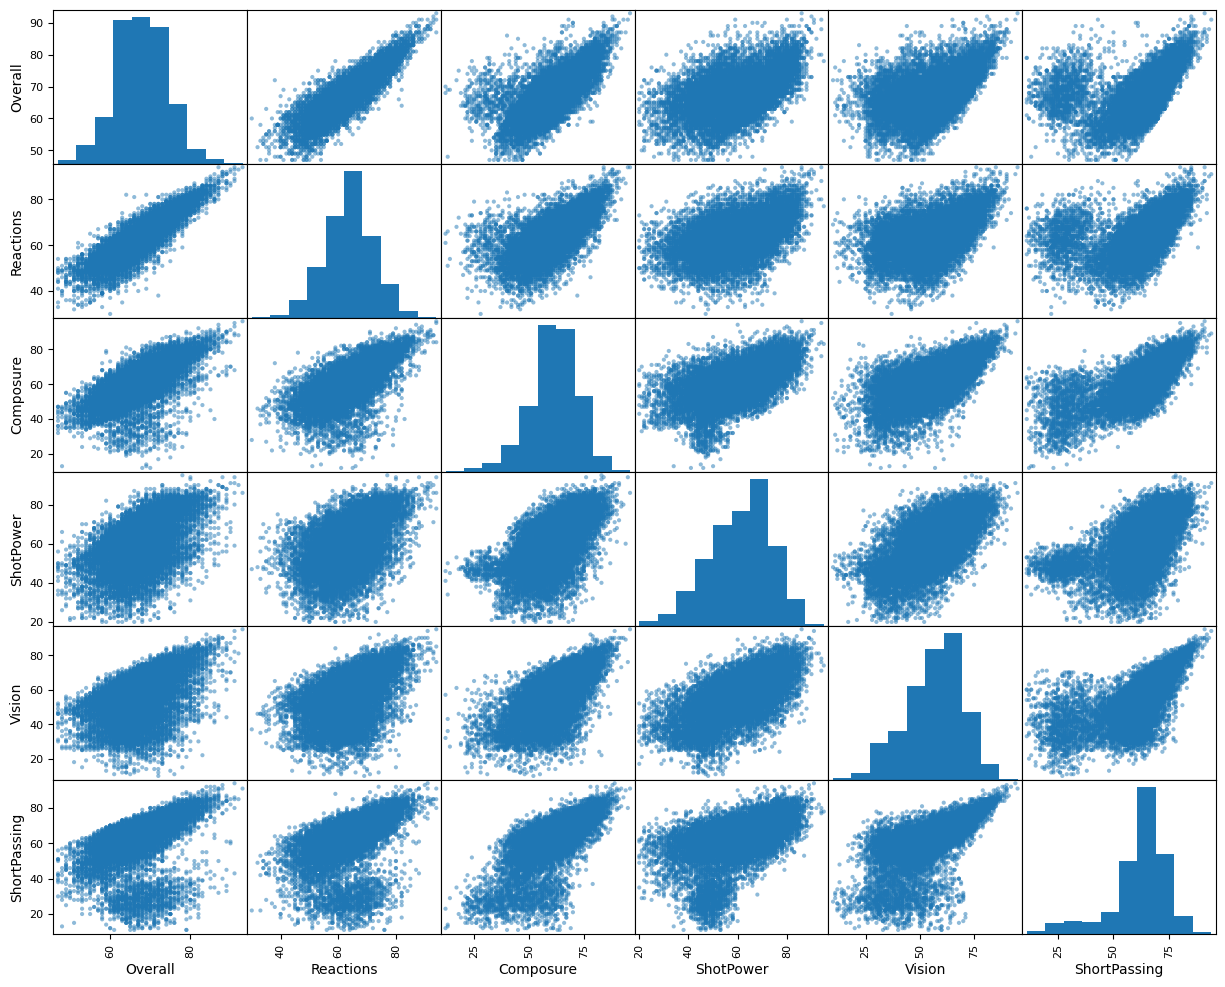

In [17]:
#Plotting Top 5 Correlated Features
attributes = ['Overall', 'Reactions', 'Composure','ShotPower', 'Vision', 'ShortPassing']
scatter_matrix(df1[attributes], figsize=(15,12))
plt.show()

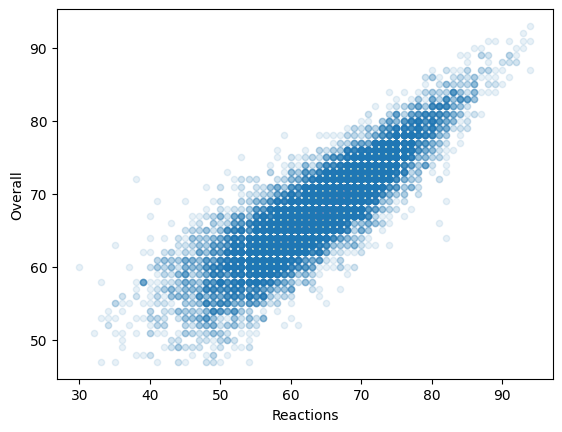

In [18]:
#Plotting 'Reactions' only
df.plot(kind='scatter', x='Reactions', y='Overall', alpha=0.1)
plt.show()

# **Model Trainning**

In [19]:
#Preparing Data
y_train = train_set['Overall']
X_train = train_set.drop('Overall', axis=1)
y_test = test_set['Overall']
X_test = test_set.drop('Overall', axis=1)


**Creating a Function for Easier Model Evaluation**





In [20]:
def model_evaluation(model):
  model.fit(X_train, y_train)

  y_predictions = model.predict(X_test)

  #RMSE
  lin_mse = mean_squared_error(y_test, y_predictions)
  rmse = np.sqrt(lin_mse)
  print("RMSE :", rmse)

  #R Squared
  r2 = r2_score(y_test, y_predictions)
  print("R² :", r2)

  #MAE
  mae = mean_absolute_error(y_test, y_predictions)
  print("MAE :", mae)

**Testing Three Different Models and Comparing Between Them**

In [21]:
#Linear Regression
lin_reg = LinearRegression()
model_evaluation(lin_reg)

RMSE : 2.242576965244002
R² : 0.8714839244055785
MAE : 1.7506267866357101


In [22]:
#Decision Tree
tree_reg = DecisionTreeRegressor(random_state=42)
model_evaluation(tree_reg)

RMSE : 2.0722434696333556
R² : 0.8902652191117164
MAE : 1.5426985482493596


In [23]:
#Random Forest
forest_reg = RandomForestRegressor(random_state=42)
model_evaluation(forest_reg)

RMSE : 1.2563402484248152
R² : 0.9596654433390638
MAE : 0.9512040990606319



**Based on the Following Metrics, We Can Conclude That Random Forest is the Best Algorithm for Our Task**

# **Hyperparameter Tuning**

In [24]:
#Defining Different Combinations of Hyperparameters
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]

#Using Grid Search with 5 Folds to Get The best Combination
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [25]:
#Inserting Them in Our Final Model
final_model =grid_search.best_estimator_
final_model

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

**Our Model VS FIFA**

In [26]:
# Comparing Between Actual and Predicted Ratings
some_data = X_test.iloc[5:10]
some_label = y_test.iloc[5:10]
predictions = final_model.predict(some_data)

# Creating DataFrame for better display
results = pd.DataFrame({
    "Index": some_data.index,
    "Actual Label": some_label.values,
    "Predicted Label": final_model.predict(some_data)
})

print(results)

   Index  Actual Label  Predicted Label
0   6371            69        69.633333
1   1470            75        75.733333
2  12352            69        69.200000
3   5709            68        66.900000
4  16135            70        70.066667


**Not too Far  ^_^**